In [2]:
import pandas as pd
import json
pd.set_option('display.max_columns', None)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# Load your datasets
data = pd.read_excel('../../data/globalterrorismdb_0522dist.xlsx')
data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,Na

In [4]:
# number of unique country 
print("nomnre de pays unique", data['country_txt'].nunique())

nomnre de pays unique 204


In [5]:
data_filtered = data[data['iyear'] >= 1970]



In [6]:
attacks_per_year_country = data_filtered.groupby(['iyear', 'country_txt']).size().reset_index(name='num_attacks')

mean_attacks_per_country = attacks_per_year_country.groupby('country_txt')['num_attacks'].mean().reset_index()
mean_attacks_per_country.rename(columns={'num_attacks': 'mean_attacks'}, inplace=True)

attacks_per_year_country = attacks_per_year_country.merge(mean_attacks_per_country, on='country_txt')

attacks_per_year_country['deviation'] = attacks_per_year_country['num_attacks'] - attacks_per_year_country['mean_attacks']
attacks_per_year_country.head()



,iyear,country_txt,num_attacks,mean_attacks,deviation
0,1970,Argentina,21,19.209302,1.790698
1,1970,Australia,1,3.636364,-2.636364
2,1970,Belgium,1,4.351351,-3.351351
3,1970,Bolivia,1,10.187500,-9.187500
4,1970,Brazil,6,7.195122,-1.195122


In [7]:
highest_mean_attacks = mean_attacks_per_country.nlargest(20, 'mean_attacks')
print("20 Countries with Highest Mean Attacks:")
print(highest_mean_attacks)

20 Countries with Highest Mean Attacks:
        country_txt  mean_attacks
84             Iraq    688.025000
0       Afghanistan    540.571429
134        Pakistan    337.043478
80            India    309.533333
199           Yemen    215.250000
52      El Salvador    212.800000
35         Colombia    185.729167
140     Philippines    168.795918
130         Nigeria    168.181818
159         Somalia    139.921053
102           Libya    139.166667
139            Peru    138.886364
187  United Kingdom    110.260000
174           Syria     99.900000
178        Thailand     95.477273
182          Turkey     91.530612
2           Algeria     83.424242
147          Russia     80.071429
166       Sri Lanka     76.025000
185         Ukraine     75.750000


In [8]:
highest_deviation = attacks_per_year_country.nlargest(50, 'deviation')
print("50 Countries with Highest Deviation:")
highest_deviation[['country_txt', 'iyear', 'num_attacks', 'mean_attacks', 'deviation']]

50 Countries with Highest Deviation:


,country_txt,iyear,num_attacks,mean_attacks,deviation
3390,Iraq,2014,3934,688.025000,3245.975000
3593,Iraq,2016,3395,688.025000,2706.975000
3298,Iraq,2013,2852,688.025000,2163.975000
3968,Afghanistan,2020,2604,540.571429,2063.428571
3489,Iraq,2015,2751,688.025000,2062.975000
3321,Pakistan,2013,2215,337.043478,1877.956522
3695,Iraq,2017,2548,688.025000,1859.975000
3419,Pakistan,2014,2149,337.043478,1811.956522
3451,Afghanistan,2015,1928,540.571429,1387.428571
3229,Pakistan,2012,1655,337.043478,1317.956522


In [9]:
# Filtrer pour ne garder que les déviations positives
positive_deviations = attacks_per_year_country[attacks_per_year_country['deviation'] > 0]

# Optionnel : trier les résultats par déviation pour voir les plus fortes en premier
positive_deviations_sorted = positive_deviations.sort_values(by='deviation', ascending=False)

# Afficher les résultats
print("Pays avec des déviations positives (indiquant un potentiel conflit) :")
positive_deviations_sorted[['country_txt', 'iyear', 'num_attacks', 'mean_attacks', 'deviation']]


Pays avec des déviations positives (indiquant un potentiel conflit) :


,country_txt,iyear,num_attacks,mean_attacks,deviation
3390,Iraq,2014,3934,688.025000,3245.975000
3593,Iraq,2016,3395,688.025000,2706.975000
3298,Iraq,2013,2852,688.025000,2163.975000
3968,Afghanistan,2020,2604,540.571429,2063.428571
3489,Iraq,2015,2751,688.025000,2062.975000
...,...,...,...,...,...
378,Namibia,1978,8,7.947368,0.052632
3576,Ecuador,2016,6,5.975610,0.024390
1003,Ecuador,1987,6,5.975610,0.024390
1731,Ecuador,1995,6,5.975610,0.024390


In [10]:
""" # Filtrer les déviations positives
positive_deviations = attacks_per_year_country[attacks_per_year_country['deviation'] > 0]

# Regrouper par pays et année et calculer la somme des déviations positives
conflict_signs = positive_deviations.groupby(['country_txt', 'iyear']).agg(
    total_positive_deviation=('deviation', 'sum')
).reset_index()

# Créer un DataFrame pour suivre le cumul des années avec des déviations positives
conflict_signs['num_years_with_positive_deviation'] = (
    conflict_signs.groupby('country_txt').cumcount() + 1
)

# Remplacer les NaN par 0 pour les années sans déviations positives
conflict_signs['num_years_with_positive_deviation'] = conflict_signs['num_years_with_positive_deviation'].fillna(0)

# Afficher les résultats, en gardant uniquement les pays avec des déviations positives élevées
threshold = 300  # Remplacer par la valeur souhaitée pour filtrer les déviations positives
high_conflict_countries = conflict_signs[conflict_signs['total_positive_deviation'] > threshold]

# Afficher les résultats
print("Pays avec des déviations positives élevées indiquant un potentiel conflit :")
high_conflict_countries.sort_values(by='num_years_with_positive_deviation', ascending=False)
 """

' # Filtrer les déviations positives\npositive_deviations = attacks_per_year_country[attacks_per_year_country[\'deviation\'] > 0]\n\n# Regrouper par pays et année et calculer la somme des déviations positives\nconflict_signs = positive_deviations.groupby([\'country_txt\', \'iyear\']).agg(\n    total_positive_deviation=(\'deviation\', \'sum\')\n).reset_index()\n\n# Créer un DataFrame pour suivre le cumul des années avec des déviations positives\nconflict_signs[\'num_years_with_positive_deviation\'] = (\n    conflict_signs.groupby(\'country_txt\').cumcount() + 1\n)\n\n# Remplacer les NaN par 0 pour les années sans déviations positives\nconflict_signs[\'num_years_with_positive_deviation\'] = conflict_signs[\'num_years_with_positive_deviation\'].fillna(0)\n\n# Afficher les résultats, en gardant uniquement les pays avec des déviations positives élevées\nthreshold = 300  # Remplacer par la valeur souhaitée pour filtrer les déviations positives\nhigh_conflict_countries = conflict_signs[confli

In [11]:
# Filtrer les déviations positives
positive_deviations = attacks_per_year_country
print("nombre de pays avec des déviations positives", positive_deviations['country_txt'].nunique())
# Regrouper par pays et année et calculer la somme des déviations positives
conflict_signs = positive_deviations.groupby(['country_txt', 'iyear']).agg(
    total_positive_deviation=('deviation', 'sum')
).reset_index()

# Définir le seuil pour filtrer les déviations positives élevées
threshold = 0

# Appliquer la logique d'incrémentation basée sur le seuil pour chaque pays
conflict_signs['num_years_with_positive_deviation'] = 0  # Initialise la colonne

for country in conflict_signs['country_txt'].unique():
    country_mask = conflict_signs['country_txt'] == country
    deviations_above_threshold = conflict_signs.loc[country_mask, 'total_positive_deviation'] > threshold
    conflict_signs.loc[country_mask, 'num_years_with_positive_deviation'] = deviations_above_threshold.cumsum()

# Filtrer les pays ayant une déviation totale supérieure au seuil
high_conflict_countries = conflict_signs[conflict_signs['total_positive_deviation'] > threshold]

# Afficher les résultats triés par le nombre d'années avec déviation positive
high_conflict_countries_sorted = high_conflict_countries.sort_values(
    by='num_years_with_positive_deviation', ascending=False
)

# Afficher les résultats
high_conflict_countries_sorted

print("nombre de pays avec des déviations positives", high_conflict_countries['country_txt'].nunique())


nombre de pays avec des déviations positives 204
nombre de pays avec des déviations positives 182


In [12]:
pd.set_option('display.max_columns', None)
high_conflict_countries = high_conflict_countries.sort_values(by='num_years_with_positive_deviation', ascending=False)
high_conflict_countries.sort_values(by="iyear", ascending=True)

,country_txt,iyear,total_positive_deviation,num_years_with_positive_deviation
971,East Germany (GDR),1970,9.285714,1
120,Argentina,1970,1.790698,1
3762,United States,1970,405.580000,1
1907,Jordan,1970,5.441176,1
3812,Uruguay,1970,27.875000,1
...,...,...,...,...
647,Central African Republic,2020,19.391304,7
1431,Guyana,2020,3.937500,4
3494,Tanzania,2020,4.619048,6
3811,United States,2020,40.580000,18


In [13]:
# regarder le salvador El Salvador	

positive_deviations[positive_deviations['country_txt'] == 'El Salvador']

,iyear,country_txt,num_attacks,mean_attacks,deviation
78,1972,El Salvador,2,212.8,-210.8
117,1973,El Salvador,1,212.8,-211.8
160,1974,El Salvador,3,212.8,-209.8
199,1975,El Salvador,3,212.8,-209.8
248,1976,El Salvador,13,212.8,-199.8
303,1977,El Salvador,6,212.8,-206.8
360,1978,El Salvador,91,212.8,-121.8
423,1979,El Salvador,326,212.8,113.2
496,1980,El Salvador,710,212.8,497.2
568,1981,El Salvador,664,212.8,451.2


In [14]:
high_conflict_countries[high_conflict_countries['country_txt'] == 'El Salvador']

,country_txt,iyear,total_positive_deviation,num_years_with_positive_deviation
1089,El Salvador,1991,287.2,11
1087,El Salvador,1989,143.2,10
1086,El Salvador,1988,154.2,9
1085,El Salvador,1987,21.2,8
1083,El Salvador,1985,223.2,7
1082,El Salvador,1984,60.2,6
1081,El Salvador,1983,158.2,5
1080,El Salvador,1982,324.2,4
1079,El Salvador,1981,451.2,3
1078,El Salvador,1980,497.2,2


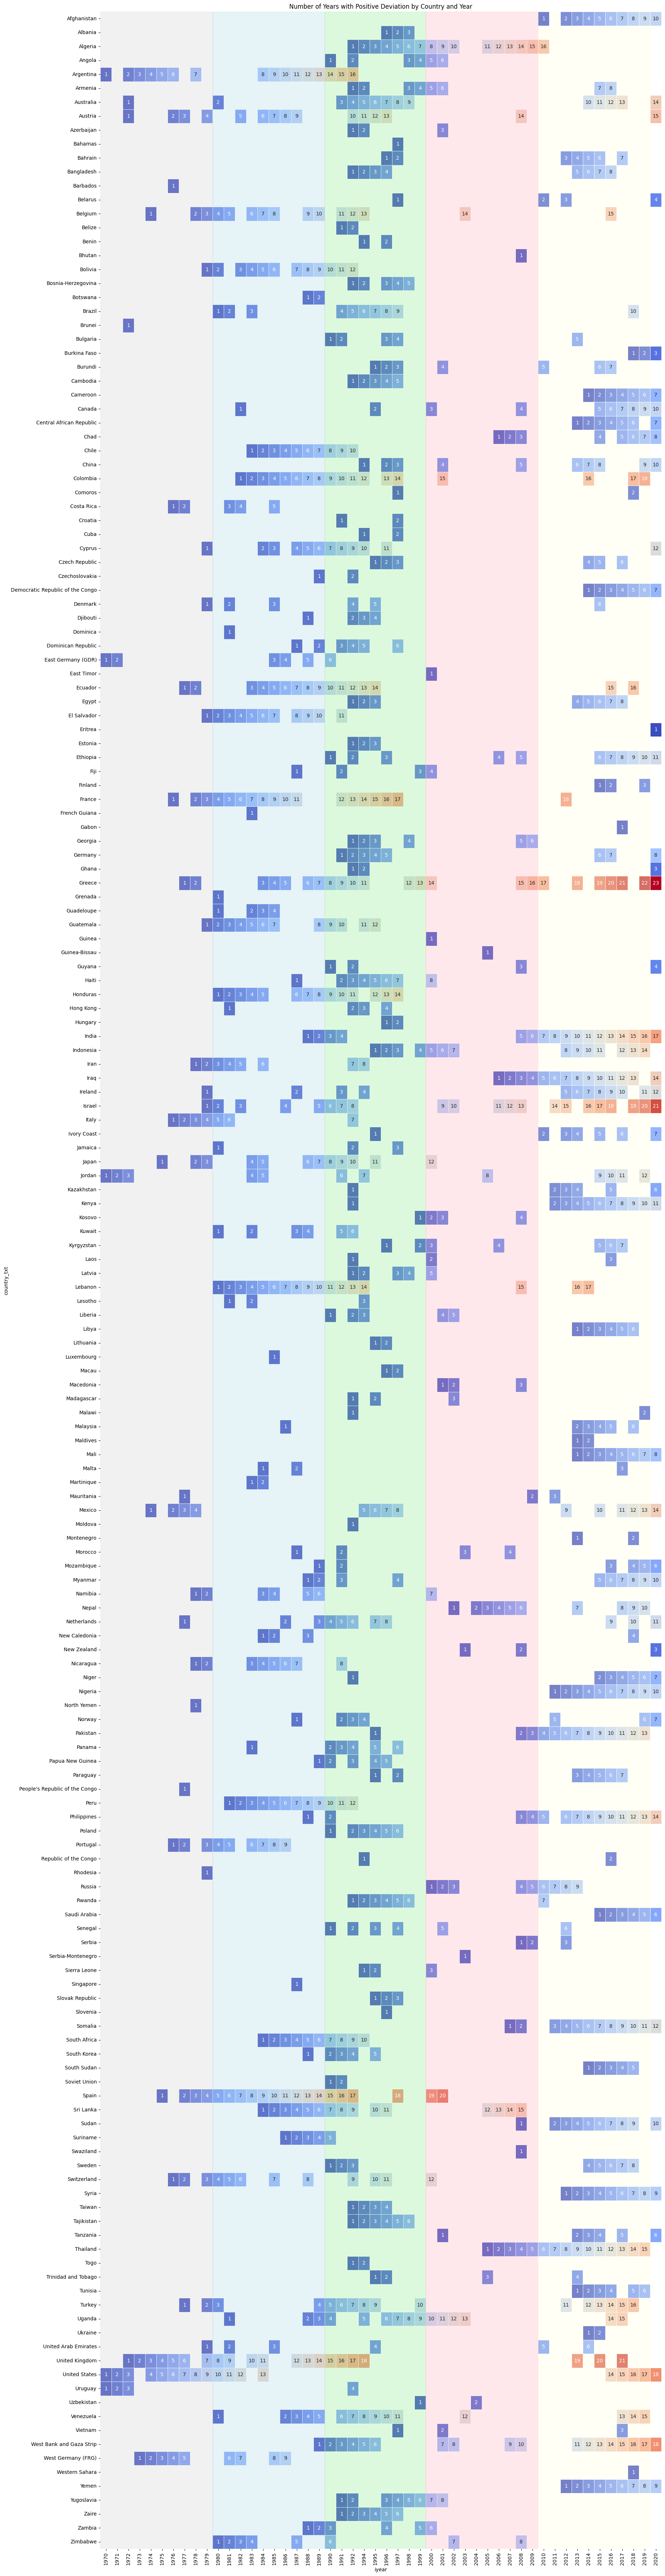

In [15]:
heatmap_data = high_conflict_countries.pivot(index="country_txt", columns="iyear", values="num_years_with_positive_deviation")
heatmap_data
plt.figure(figsize=(20, len(heatmap_data) // 2))
ax = sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=.5, cbar=False)

years = heatmap_data.columns

ax.axvspan(years.get_loc(1970), years.get_loc(1980), color='lightgrey', alpha=0.3, label='1970-1980')  
ax.axvspan(years.get_loc(1980), years.get_loc(1990), color='lightblue', alpha=0.3, label='1980-1990') 
ax.axvspan(years.get_loc(1990), years.get_loc(2000), color='lightgreen', alpha=0.3, label='1990-2000')
ax.axvspan(years.get_loc(2000), years.get_loc(2010), color='lightpink', alpha=0.3, label='2000-2010') 
ax.axvspan(years.get_loc(2010), years.get_loc(2020), color='lightyellow', alpha=0.3, label='2010-2020')


plt.title("Number of Years with Positive Deviation by Country and Year")
plt.show()

In [16]:
# compter le nombre de pays 
print("nomnre de pays unique", data['country_txt'].nunique())
print("nomnre de pays unique", high_conflict_countries['country_txt'].nunique())
high_conflict_countries

nomnre de pays unique 204
nomnre de pays unique 182


,country_txt,iyear,total_positive_deviation,num_years_with_positive_deviation
1354,Greece,2020,22.280000,23
1353,Greece,2019,4.280000,22
1781,Israel,2020,22.040816,21
1351,Greece,2017,16.280000,21
3758,United Kingdom,2017,12.740000,21
...,...,...,...,...
3980,Yemen,2012,97.750000,1
4014,Zaire,1991,1.454545,1
61,Algeria,1992,131.575758,1
40,Albania,1996,1.900000,1


In [17]:
# regarder les datas de la france
positive_deviations[positive_deviations['country_txt'] == 'France']

,iyear,country_txt,num_attacks,mean_attacks,deviation
79,1972,France,11,57.3125,-46.3125
119,1973,France,14,57.3125,-43.3125
162,1974,France,29,57.3125,-28.3125
201,1975,France,39,57.3125,-18.3125
250,1976,France,58,57.3125,0.6875
305,1977,France,53,57.3125,-4.3125
362,1978,France,59,57.3125,1.6875
425,1979,France,212,57.3125,154.6875
497,1980,France,94,57.3125,36.6875
569,1981,France,66,57.3125,8.6875


In [18]:
attacks_per_year_country = data_filtered.groupby(['iyear','imonth', 'country_txt']).size().reset_index(name='num_attacks')

mean_attacks_per_country = attacks_per_year_country.groupby('country_txt')['num_attacks'].mean().reset_index()
mean_attacks_per_country.rename(columns={'num_attacks': 'mean_attacks'}, inplace=True)

attacks_per_year_country = attacks_per_year_country.merge(mean_attacks_per_country, on='country_txt')

attacks_per_year_country['deviation'] = attacks_per_year_country['num_attacks'] - attacks_per_year_country['mean_attacks']


In [42]:
attacks_per_year_country.head()

,iyear,imonth,country_txt,num_attacks,mean_attacks,deviation,date,iday
0,1970,0,Mexico,1,2.597403,-1.597403,1970-0,1
1,1970,1,East Germany (GDR),2,1.461538,0.538462,1970-1,1
2,1970,1,Ethiopia,1,2.000000,-1.000000,1970-1,1
3,1970,1,Greece,1,3.482412,-2.482412,1970-1,1
4,1970,1,Guatemala,1,8.422131,-7.422131,1970-1,1


In [44]:
attacks_per_year_country.loc[attacks_per_year_country['country_txt'] == 'France']

# drop row where imonth equals to 0
attacks_per_year_country = attacks_per_year_country[attacks_per_year_country['imonth'] != 0]

attacks_per_year_country['iday'] = 1

attacks_per_year_country['date'] = pd.to_datetime(attacks_per_year_country['iyear'].astype(str) + '-' + attacks_per_year_country['imonth'].astype(str) + '-' + attacks_per_year_country['iday'].astype(str), errors='raise', format='%Y-%m-%d')


# merge iyear and imonth in a date

In [45]:
attacks_per_year_country.loc[attacks_per_year_country['country_txt'] == 'France']

,iyear,imonth,country_txt,num_attacks,mean_attacks,deviation,date,iday
245,1972,5,France,4,6.154362,-2.154362,1972-05-01,1
268,1972,8,France,1,6.154362,-5.154362,1972-08-01,1
285,1972,9,France,2,6.154362,-4.154362,1972-09-01,1
300,1972,10,France,2,6.154362,-4.154362,1972-10-01,1
308,1972,11,France,1,6.154362,-5.154362,1972-11-01,1
...,...,...,...,...,...,...,...,...
19943,2020,6,France,1,6.154362,-5.154362,2020-06-01,1
19999,2020,7,France,1,6.154362,-5.154362,2020-07-01,1
20050,2020,8,France,4,6.154362,-2.154362,2020-08-01,1
20097,2020,9,France,1,6.154362,-5.154362,2020-09-01,1


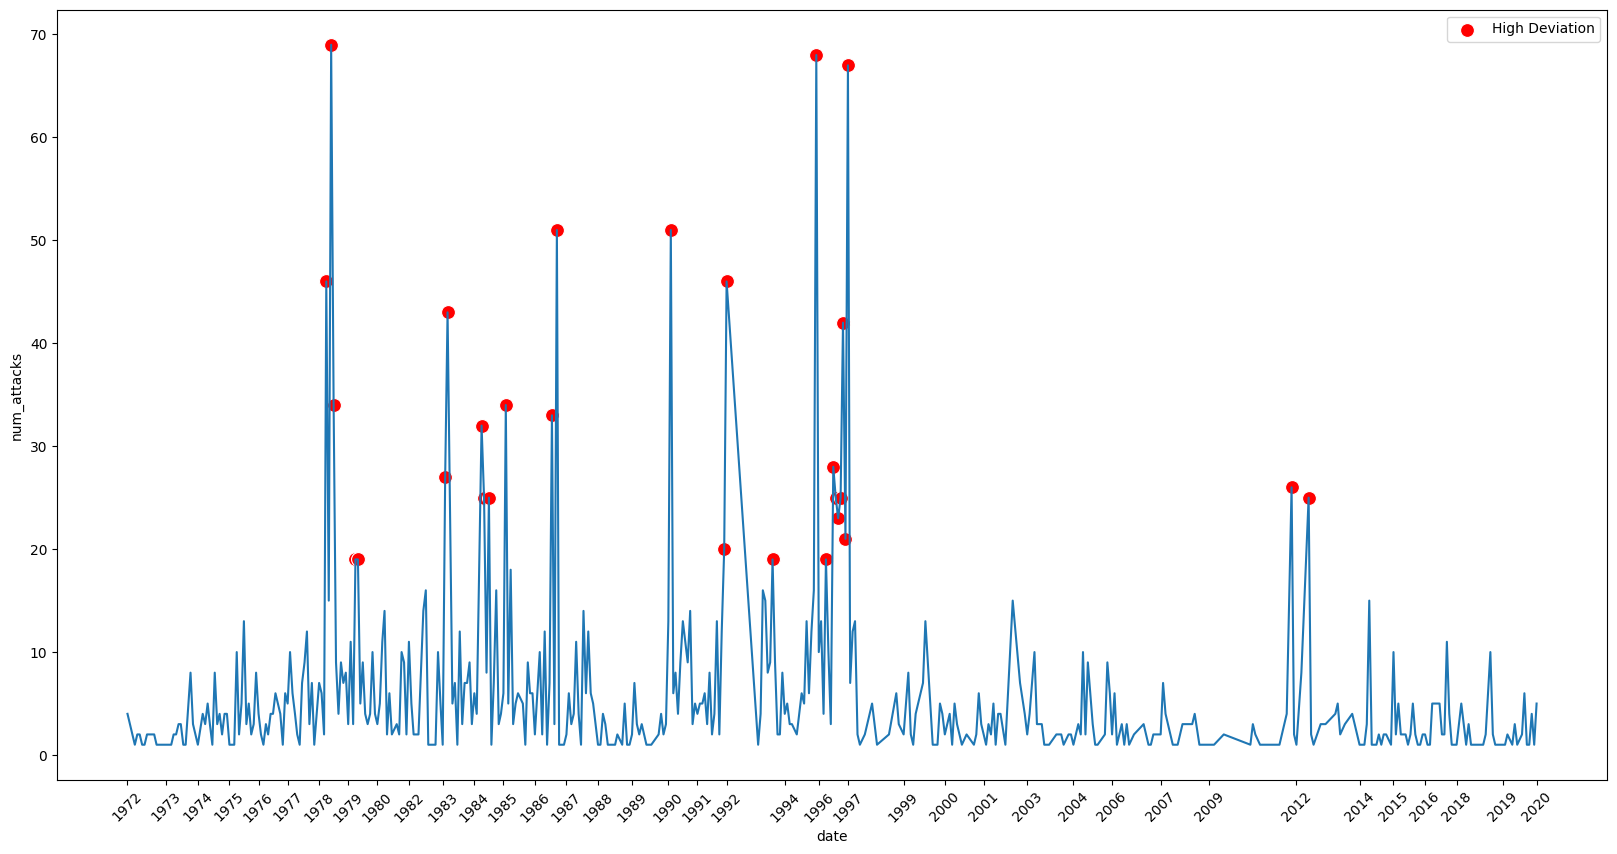

In [46]:
attacks_per_year_country.loc[attacks_per_year_country['country_txt'] == 'Italy']

country = 'France'

# plot the number of attacks per year for France
country_data = attacks_per_year_country.loc[attacks_per_year_country['country_txt'] == country]
plt.figure(figsize=(20, 10))
sns.lineplot(data=country_data, x='date', y='num_attacks')
plt.xticks(ticks=country_data['date'][::12], labels=country_data['iyear'][::12], rotation=45)
deviation_threshold = 12
high_deviation_points = country_data[country_data['deviation'] > deviation_threshold]

sns.scatterplot(data=high_deviation_points, x='date', y='num_attacks', color='red', s=100, label='High Deviation')
plt.legend()
plt.show()